# Book Recommendation System

## Team 12

## Chetan Nain (015761122)

### Python statements that imports libraries and data

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
books_data = pd.read_csv("../data/Books.csv")
users_data = pd.read_csv("../data/Users.csv")
ratings_data = pd.read_csv("../data/Ratings.csv")

In [83]:
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [84]:
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [85]:
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [86]:
books_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [87]:
users_data.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [88]:
ratings_data.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Renaming columns and cleaning data in the dataframes

In [97]:
users_data['City'] = users_data['Location'].str.split(',', expand=True)[0]
users_data['State'] = users_data['Location'].str.split(',', expand=True)[1]
users_data['Country'] = users_data['Location'].str.split(',', expand=True)[2]

users_data['City'] = users_data['City'].str.strip()
users_data['State'] = users_data['State'].str.strip()
users_data['Country'] = users_data['Country'].str.strip()

In [98]:
users_data.drop(columns=['Location'])

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,NaN,portland,oregon,usa
278854,278855,50.0,tacoma,washington,united kingdom
278855,278856,NaN,brampton,ontario,canada
278856,278857,NaN,knoxville,tennessee,usa


In [99]:
merged_df = pd.merge(ratings_data,users_data, how="inner")

In [100]:
merged_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country
0,276725,034545104X,0,"tyler, texas, usa",NaN,tyler,texas,usa
1,276726,0155061224,5,"seattle, washington, usa",NaN,seattle,washington,usa
2,276727,0446520802,0,"h, new south wales, australia",16.0,h,new south wales,australia
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,rijeka,n/a,croatia


In [101]:
df = pd.merge(merged_df, books_data, how = "inner")

In [102]:
df.head()

,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,strafford,missouri,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,st. charles county,missouri,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,beaverton,oregon,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


## Data Exploration Step

In [103]:
df.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    277835
City                        0
State                       0
Country                     0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64

In [104]:
df.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Location             1031136 non-null  object 
 4   Age                  753301 non-null   float64
 5   City                 1031136 non-null  object 
 6   State                1031136 non-null  object 
 7   Country              1031136 non-null  object 
 8   Book-Title           1031136 non-null  object 
 9   Book-Author          1031135 non-null  object 
 10  Year-Of-Publication  1031136 non-null  object 
 11  Publisher            1031134 non-null  object 
 12  Image-URL-S          1031136 non-null  object 
 13  Image-URL-M          1031136 non-null  object 
 14  Image-URL-L          1031132 non-null  object 
dty

### Bar chart to show top books from Cincinnati in the Year 1996

<AxesSubplot:xlabel='Book-Rating', ylabel='Book-Title'>

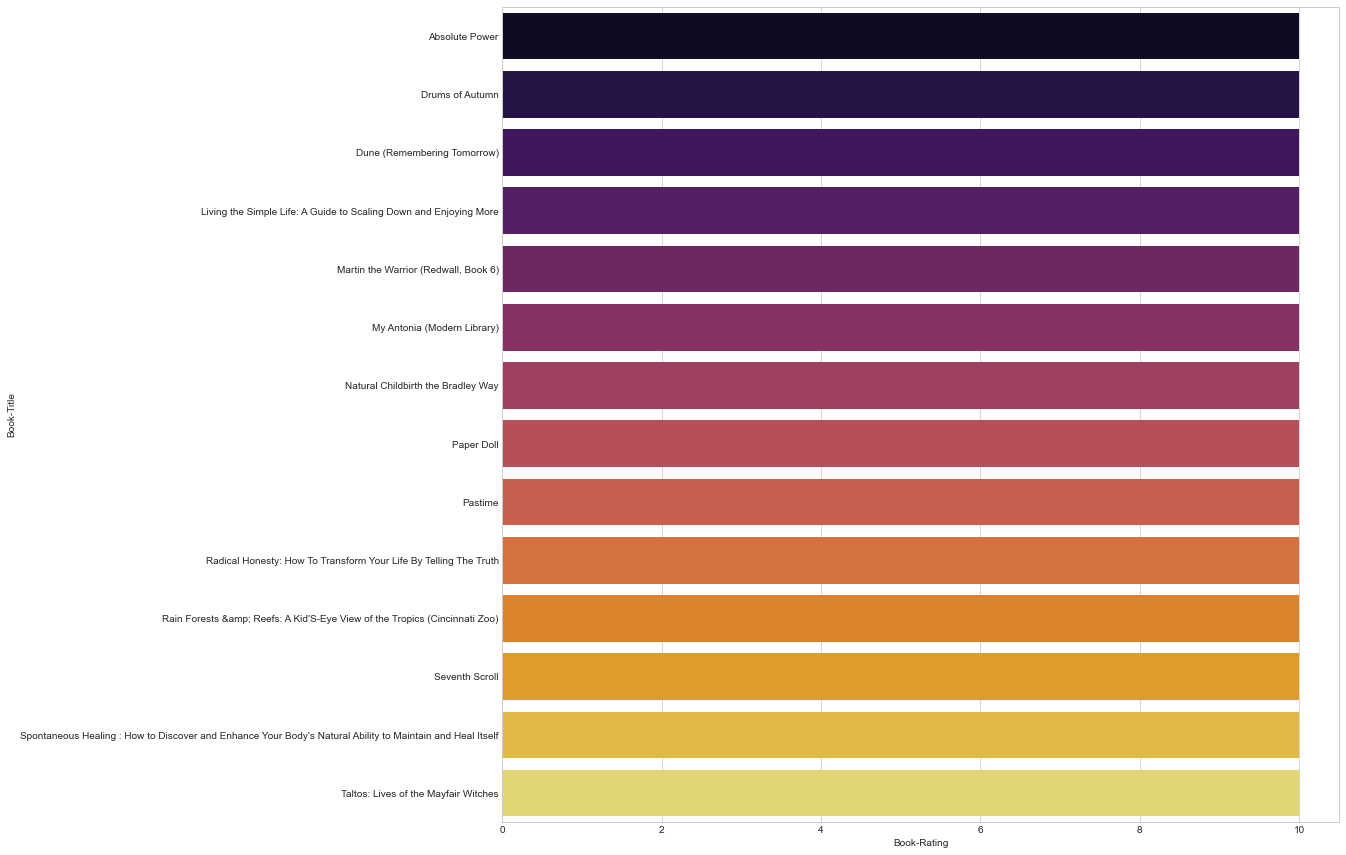

In [135]:
top_ten = top_ten = df[(df['Year-Of-Publication']==1996) & (df['Book-Rating']== 10) & (df['City']=='cincinnati')]

top_ten = top_ten.sort_values(by='Book-Title', ascending=True).head(15)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,15))

sns.barplot(x='Book-Rating', y='Book-Title', data=top_ten, palette='inferno')

In [137]:
# Books with ratings = 0
df = df[df['Book-Rating']== 0]
df.shape

(647294, 15)

### Authors with maximum numbers of books

In [138]:
book_aut = df.groupby('Book-Author')['Book-Title'].count().reset_index().sort_values('Book-Title', ascending=False).head(10).set_index('Book-Author')

In [139]:
book_aut

,Book-Title
Book-Author,
Nora Roberts,5491
Stephen King,5414
John Grisham,3460
James Patterson,3458
Mary Higgins Clark,3100
Dean R. Koontz,2838
Tom Clancy,2813
Danielle Steel,2650
Sue Grafton,2222
